In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Lakshmi Devi\Desktop\Excel Tutioral\New Datasets\Black Friday Sales Prediction\train.csv")
df_test = pd.read_csv(r"C:\Users\Lakshmi Devi\Desktop\Excel Tutioral\New Datasets\Black Friday Sales Prediction\test.csv")

In [3]:
print(df.shape)
df.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
print(df_test.shape)
df_test.head()

(233599, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
df.apply(lambda x: x.dtype)

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category_1            object
Product_Category_2            object
Product_Category_3            object
Purchase                      object
dtype: object

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
        'Purchase'],
       dtype='object'),
 dtype('float64'): Index(['Product_Category_2', 'Product_Category_3'], dtype='object'),
 dtype('O'): Index(['Product_ID', 'Gender', 'Age', 'City_Category',
        'Stay_In_Current_City_Years'],
       dtype='object')}

In [9]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
data = pd.concat([df, df_test],ignore_index=True)
print(df.shape, df_test.shape, data.shape)

(550068, 12) (233599, 11) (783667, 12)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [13]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [14]:
print(data.groupby('Product_Category_2').size())

Product_Category_2
2.0     70498
3.0      4123
4.0     36705
5.0     37165
6.0     23575
7.0       854
8.0     91317
9.0      8177
10.0     4420
11.0    20230
12.0     7801
13.0    15054
14.0    78834
15.0    54114
16.0    61687
17.0    19104
18.0     4027
dtype: int64


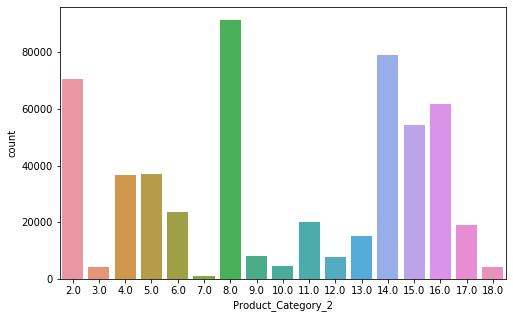

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(data['Product_Category_2'],label="Count")
plt.show()

In [16]:
print(data.groupby('Product_Category_3').size())

Product_Category_3
3.0       878
4.0      2691
5.0     23799
6.0      6888
8.0     17861
9.0     16532
10.0     2501
11.0     2585
12.0    13115
13.0     7849
14.0    26283
15.0    39968
16.0    46469
17.0    23818
18.0     6621
dtype: int64


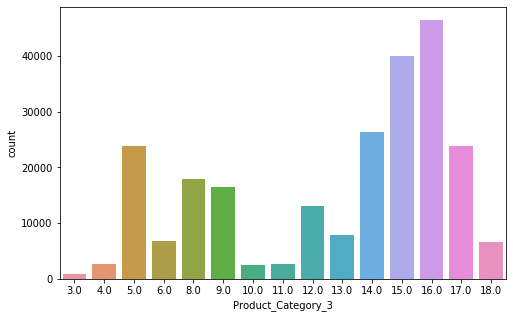

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(data['Product_Category_3'],label="Count")
plt.show()

# Data Visualization

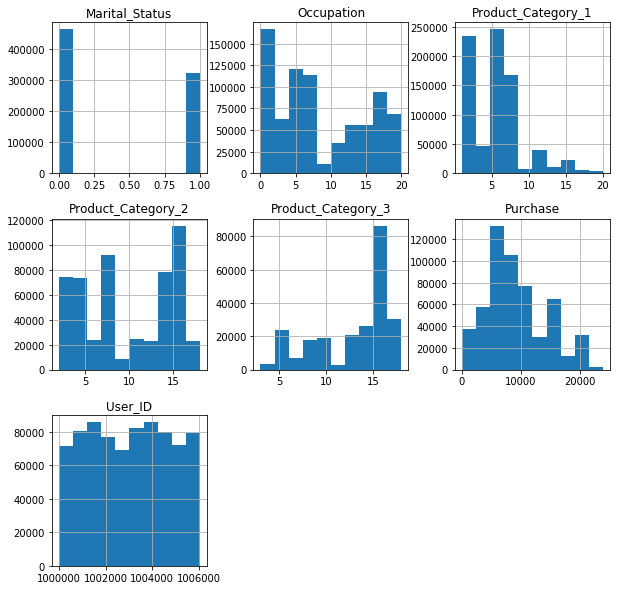

In [18]:
data.hist(figsize = (10, 10))
plt.show()

# Box Plot

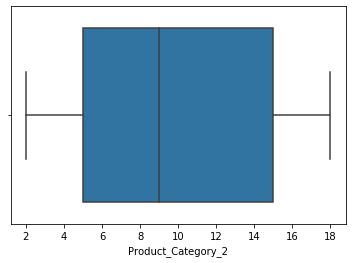

In [19]:
import seaborn as sns
sns.boxplot(x=data['Product_Category_2'])

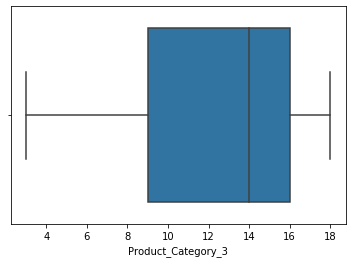

In [20]:
import seaborn as sns
sns.boxplot(x=data['Product_Category_3'])

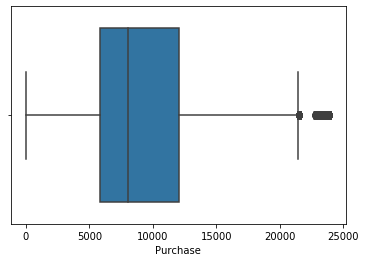

In [21]:
import seaborn as sns
sns.boxplot(x=data['Purchase'])

# Missing Values

In [22]:
total_miss = data.isnull().sum()
perc_miss = total_miss/data.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing',ascending=False).head(3)

,Total missing,% missing
Product_Category_3,545809,69.648078
Product_Category_2,245982,31.388587
Purchase,233599,29.808452


# Unique Values

In [23]:
print('Unique Values for Each Feature: \n')
for i in data.columns:
    print(i, ':',data[i].nunique())

Unique Values for Each Feature: 

Age : 7
City_Category : 3
Gender : 2
Marital_Status : 2
Occupation : 21
Product_Category_1 : 20
Product_Category_2 : 17
Product_Category_3 : 15
Product_ID : 3677
Purchase : 18105
Stay_In_Current_City_Years : 5
User_ID : 5891


In [24]:
cats = [col for col in data.columns if col not in ['Product_ID','User_ID','Product_Category_3','Purchase']]
for col in cats:
    print('unique values in ',col,':', data[col].unique(),'\n')

unique values in  Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

unique values in  City_Category : ['A' 'C' 'B'] 

unique values in  Gender : ['F' 'M'] 

unique values in  Marital_Status : [0 1] 

unique values in  Occupation : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 

unique values in  Product_Category_1 : [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 

unique values in  Product_Category_2 : [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] 

unique values in  Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0'] 



In [25]:
# Info about products
print('Number of products:',data['Product_ID'].nunique())
print('Number of categories:',data['Product_Category_1'].unique().max())
print('Highest and lowest purchase:',
      data['Purchase'].max(),',',data['Purchase'].min())

Number of products: 3677
Number of categories: 20
Highest and lowest purchase: 23961.0 , 12.0


In [26]:
# Info about shoppers
print('Number of shoppers:',data['User_ID'].nunique())
print('Years in city:',data['Stay_In_Current_City_Years'].unique())
print('Age Groups:',data['Age'].unique())

Number of shoppers: 5891
Years in city: ['2' '4+' '3' '1' '0']
Age Groups: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


# Gender

In [27]:
count_m = data[data['Gender']=='M'].count()[0]
count_f = data[data['Gender']=='F'].count()[0]

In [28]:
print('Number of male clients:',count_m)
print('Number of female clients:',count_f)

Number of male clients: 590031
Number of female clients: 193636


In [29]:
print('Female Purchases:',round(data[data['Gender']=='F']['Purchase'].sum()/count_f,3))
print('Male Purchases:',round(data[data['Gender']=='M']['Purchase'].sum()/count_m,3))

Female Purchases: 6126.096
Male Purchases: 6626.059


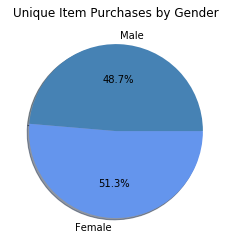

In [30]:
plt.pie(data.groupby('Gender')['Product_ID'].nunique(),labels=['Male','Female'],
       shadow=True, autopct='%1.1f%%',colors=['steelblue','cornflowerblue'])
plt.title('Unique Item Purchases by Gender')
plt.show()

In [31]:
# Individual groupby dataframes for each gender
gb_gender_m = data[data['Gender']=='M'][['Product_Category_1','Gender']].groupby(by='Product_Category_1').count()
gb_gender_f = data[data['Gender']=='F'][['Product_Category_1','Gender']].groupby(by='Product_Category_1').count()

# Concatenate and change column names
cat_bygender = pd.concat([gb_gender_m,gb_gender_f],axis=1)
cat_bygender.columns = ['M ratio','F ratio']

# Adjust to reflect ratios
cat_bygender['M ratio'] = cat_bygender['M ratio']/data[data['Gender']=='M'].count()[0]
cat_bygender['F ratio'] = cat_bygender['F ratio']/data[data['Gender']=='F'].count()[0]

# Create likelihood of one gender to buy over the other
cat_bygender['Likelihood (M/F)'] = cat_bygender['M ratio']/cat_bygender['F ratio']

cat_bygender['Total Ratio'] = cat_bygender['M ratio']+cat_bygender['F ratio']

In [32]:
cat_bygender.sort_values(by='Likelihood (M/F)',ascending=False)

,M ratio,F ratio,Likelihood (M/F),Total Ratio
Product_Category_1,,,,
17,0.001208,0.000454,2.658999,0.001663
18,0.006601,0.002794,2.362770,0.009395
9,0.000854,0.000516,1.654024,0.001371
15,0.012689,0.007731,1.641335,0.020420
1,0.279955,0.183421,1.526292,0.463376
11,0.046986,0.034689,1.354491,0.081674
10,0.009755,0.008351,1.168213,0.018106
6,0.038649,0.033682,1.147470,0.072331
2,0.044032,0.041707,1.055733,0.085739


# Age

In [33]:
# Encoding the age groups
data['Age_Encoded'] = data['Age'].map({'0-17':0,'18-25':1,
                          '26-35':2,'36-45':3,
                          '46-50':4,'51-55':5,
                          '55+':6})

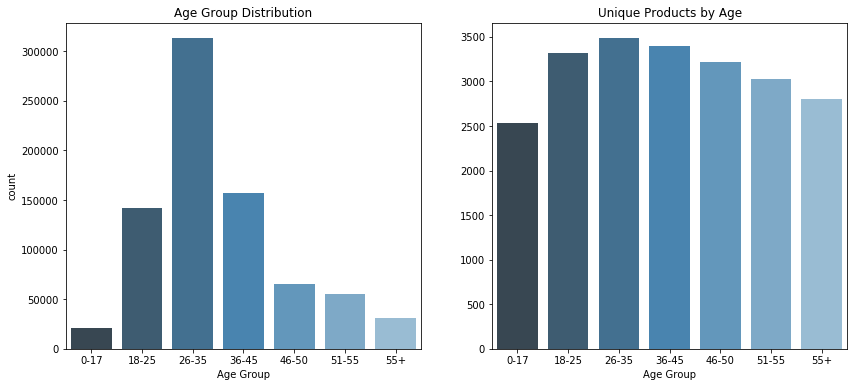

In [34]:
prod_byage = data.groupby('Age').nunique()['Product_ID']

fig,ax = plt.subplots(1,2,figsize=(14,6))
ax = ax.ravel()

sns.countplot(data['Age'].sort_values(),ax=ax[0], palette="Blues_d")
ax[0].set_xlabel('Age Group')
ax[0].set_title('Age Group Distribution')
sns.barplot(x=prod_byage.index,y=prod_byage.values,ax=ax[1], palette="Blues_d")
ax[1].set_xlabel('Age Group')
ax[1].set_title('Unique Products by Age')

plt.show()

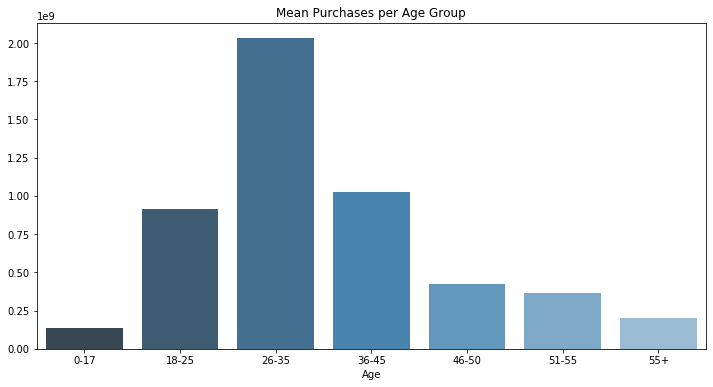

In [35]:
spent_byage = data.groupby(by='Age').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_byage.index,y=spent_byage.values, palette="Blues_d")
plt.title('Mean Purchases per Age Group')
plt.show()

# Occupation

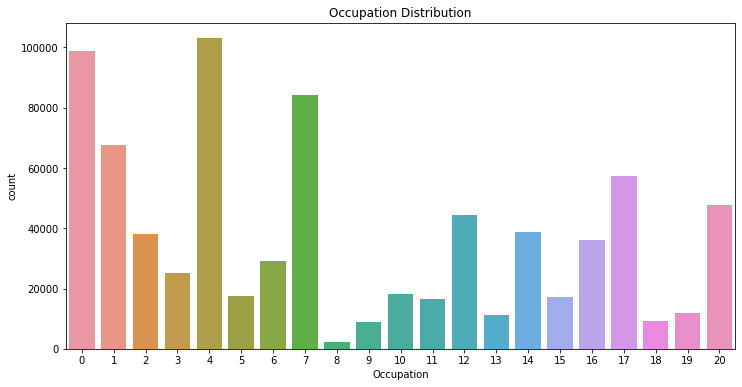

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data['Occupation'])
plt.title('Occupation Distribution')
plt.show()

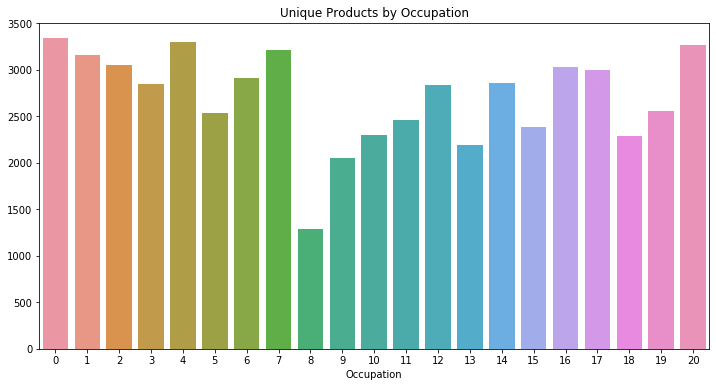

In [37]:
plt.figure(figsize=(12,6))
prod_by_occ = data.groupby(by='Occupation').nunique()['Product_ID']

sns.barplot(x=prod_by_occ.index,y=prod_by_occ.values)
plt.title('Unique Products by Occupation')
plt.show()

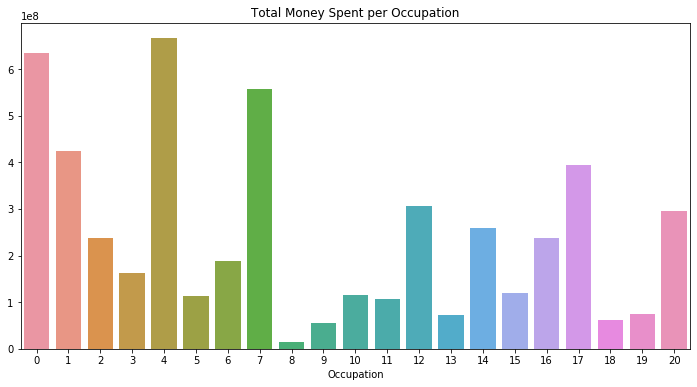

In [38]:
spent_by_occ = data.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

# Products

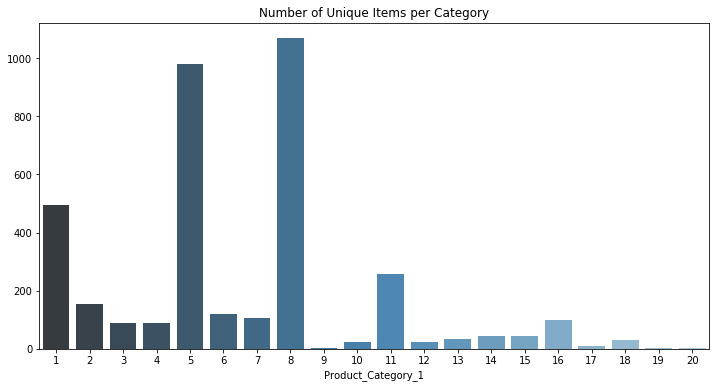

In [39]:
plt.figure(figsize=(12,6))
prod_by_cat = data.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette="Blues_d")
plt.title('Number of Unique Items per Category')
plt.show()

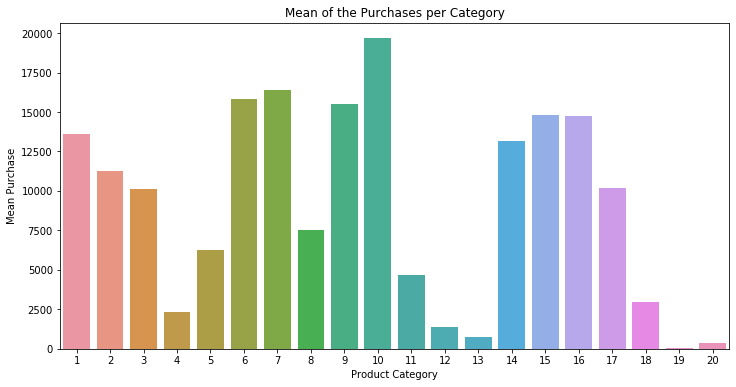

In [40]:
category = []
mean_purchase = []


for i in data['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(data[data['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

In [41]:
len(data['Product_ID'].unique())

3677

In [42]:
cat_col = ['Gender', 'City_Category']
num_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 
           'Product_Category_2', 'Product_Category_3']

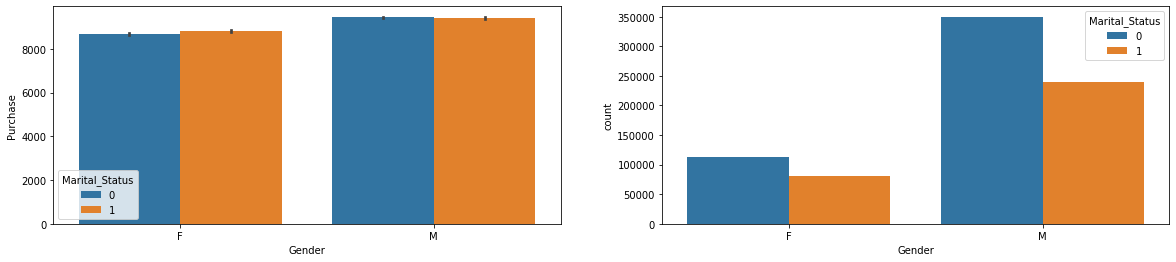

In [43]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Gender",y="Purchase",hue="Marital_Status",estimator=np.mean,data=data,ax=ax[0])
sns.countplot(x="Gender",hue="Marital_Status",data=data,ax=ax[1])

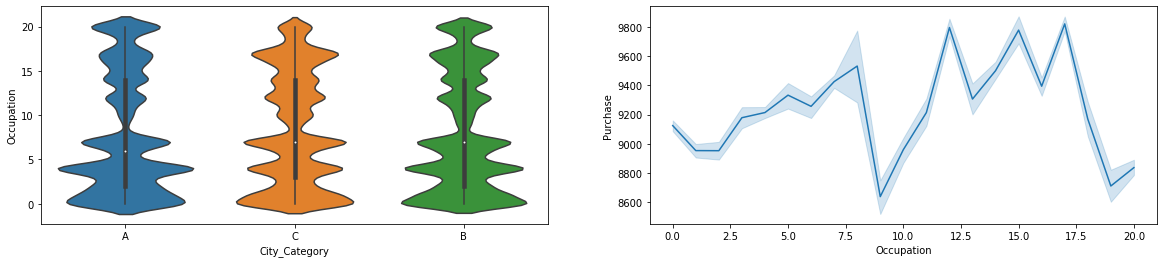

In [44]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.violinplot(x="City_Category",y="Occupation",data=data,ax=ax[0])
sns.lineplot(x="Occupation",y="Purchase",data=data,ax=ax[1])

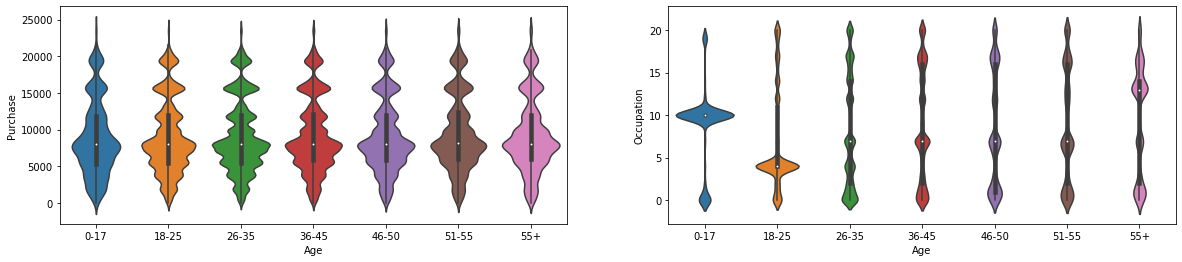

In [45]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.violinplot(x="Age",y="Purchase",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],data=data,ax=ax[0])
sns.violinplot(x="Age",y="Occupation",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],data=data,ax=ax[1])

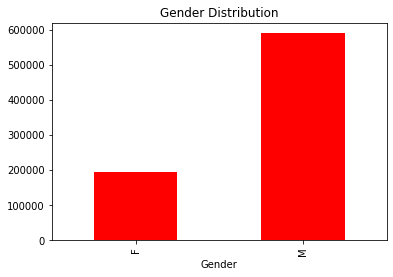

In [46]:
data.groupby('Gender').size().plot(kind='bar', title='Gender Distribution', color='red')

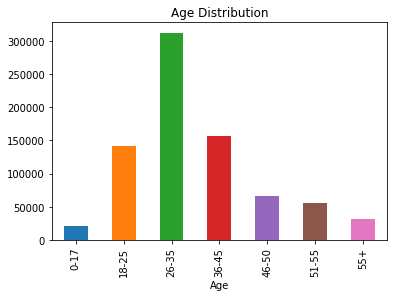

In [47]:
data.groupby('Age').size().plot(kind='bar', title='Age Distribution')

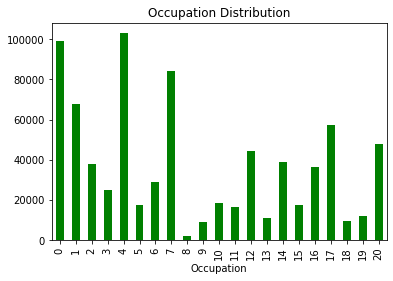

In [48]:
data.groupby('Occupation').size().plot(kind='bar', title='Occupation Distribution', color='green')

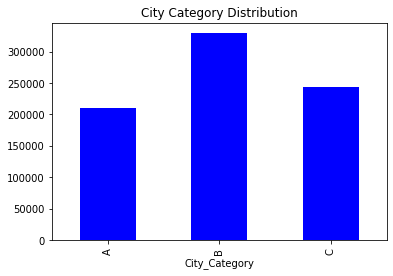

In [49]:
data.groupby('City_Category').size().plot(kind='bar', title='City Category Distribution', color='blue')

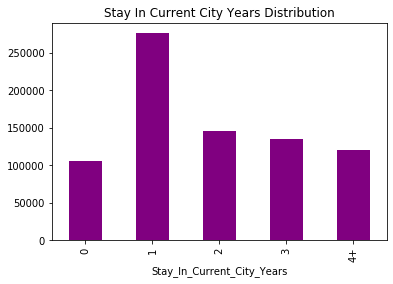

In [50]:
data.groupby('Stay_In_Current_City_Years').size().plot(kind='bar', title='Stay In Current City Years Distribution', color='purple')

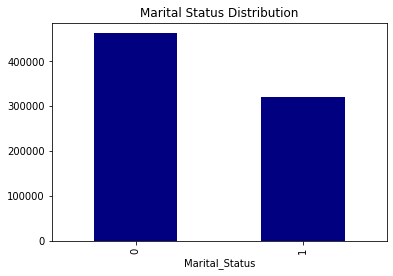

In [51]:
data.groupby('Marital_Status').size().plot(kind='bar', title='Marital Status Distribution', color='navy')

In [52]:
ageVsGender =data.groupby(['Age', 'Gender'])['Purchase'].sum()
ageVsGender

Age    Gender
0-17   F         4.238598e+07
       M         9.252720e+07
18-25  F         2.054758e+08
       M         7.083728e+08
26-35  F         4.429762e+08
       M         1.588794e+09
36-45  F         2.434390e+08
       M         7.831309e+08
46-50  F         1.167069e+08
       M         3.041365e+08
51-55  F         8.946600e+07
       M         2.776336e+08
55+    F         4.578276e+07
       M         1.549846e+08
Name: Purchase, dtype: float64

In [53]:
data['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [54]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [55]:
sum(data.duplicated())

0

In [56]:
data.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years', 'User_ID',
       'Age_Encoded'],
      dtype='object')

In [57]:
dataNew = data.copy(deep=True)

dataNew.loc[dataNew['Gender'] == 'F', 'Gender'] = 0
dataNew.loc[dataNew['Gender'] == 'M', 'Gender'] = 1

dataNew.loc[dataNew['Age'] == '0-17', 'Age'] = 0
dataNew.loc[dataNew['Age'] == '18-25', 'Age'] = 1
dataNew.loc[dataNew['Age'] == '26-35', 'Age'] = 2
dataNew.loc[dataNew['Age'] == '36-45', 'Age'] = 3
dataNew.loc[dataNew['Age'] == '46-50', 'Age'] = 4
dataNew.loc[dataNew['Age'] == '51-55', 'Age'] = 5
dataNew.loc[dataNew['Age'] == '55+', 'Age'] = 6

dataNew.loc[dataNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

dataNew.loc[dataNew['City_Category'] == 'A', 'City_Category'] = 0
dataNew.loc[dataNew['City_Category'] == 'B', 'City_Category'] = 1
dataNew.loc[dataNew['City_Category'] == 'C', 'City_Category'] = 2


dataNew['Gender'] = dataNew['Gender'].astype(int)
dataNew['Age'] = dataNew['Age'].astype(int)
dataNew['City_Category'] = dataNew['City_Category'].astype(int)
dataNew['Stay_In_Current_City_Years'] = dataNew['Stay_In_Current_City_Years'].astype(int)

In [58]:
dataNew.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,Age_Encoded
0,0,0,0,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001,0
1,0,0,0,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001,0
2,0,0,0,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001,0
3,0,0,0,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001,0
4,6,2,1,0,16,8,NaN,NaN,P00285442,7969.0,4,1000002,6


In [59]:
dataNew.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
Age_Encoded                        0
dtype: int64

In [60]:
dataNew["Product_Category_2"].fillna("0", inplace = True) 

In [61]:
dataNew["Product_Category_3"].fillna("0", inplace = True) 

In [62]:
dataNew["Purchase"].fillna("0", inplace = True) 

In [63]:
dataNew["Purchase"].head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: object

In [64]:
dataNew.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,Age_Encoded
0,0,0,0,0,10,3,0,0,P00069042,8370,2,1000001,0
1,0,0,0,0,10,1,6,14,P00248942,15200,2,1000001,0
2,0,0,0,0,10,12,0,0,P00087842,1422,2,1000001,0
3,0,0,0,0,10,12,14,0,P00085442,1057,2,1000001,0
4,6,2,1,0,16,8,0,0,P00285442,7969,4,1000002,6


In [65]:
dataNew.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years', 'User_ID',
       'Age_Encoded'],
      dtype='object')

1. which age group of customers are more likely to purchase with More amount per person?

Text(0.5, 1.0, 'Age group vs average amount spent')

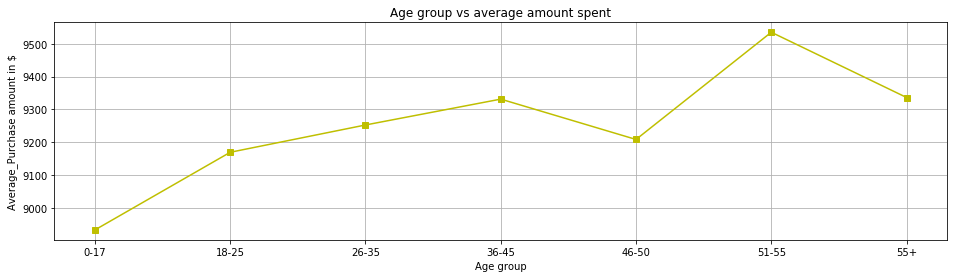

In [66]:
data = data.groupby('Age')['Purchase'].mean()
data = pd.DataFrame({'Age':data.index, 'Average_purchase':data.values})
plt.figure(figsize = (16,4))
plt.plot('Age','Average_purchase','ys-',data = data)
plt.grid()
plt.xlabel('Age group')
plt.ylabel('Average_Purchase amount in $')
plt.title('Age group vs average amount spent')

2.which age group and gender have high visiting rate to the retail store?

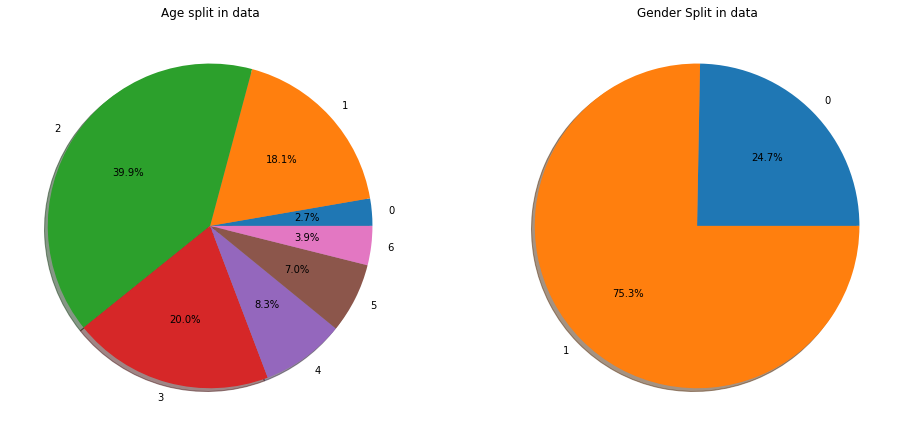

In [67]:
data_Age = dataNew.groupby('Age')['Age'].count()
data_Sex = dataNew.groupby('Gender')['Gender'].count()
data_Age = pd.DataFrame({'Age':data_Age.index, 'Count':data_Age.values})
data_Sex = pd.DataFrame({'Sex':data_Sex.index, 'Count':data_Sex.values})
plt.figure(figsize = (16,16))
plt.subplot(121)
plt.pie(data_Age['Count'],labels = data_Age['Age'],autopct='%1.1f%%',shadow=True);
plt.title('Age split in data');
plt.subplot(122)
plt.pie(data_Sex['Count'],labels = data_Sex['Sex'],autopct='%1.1f%%',shadow=True);
plt.title('Gender Split in data');

3.which occupation type have high purchase rate?

Text(0.5, 1.0, 'Spread of occupation types in the sale')

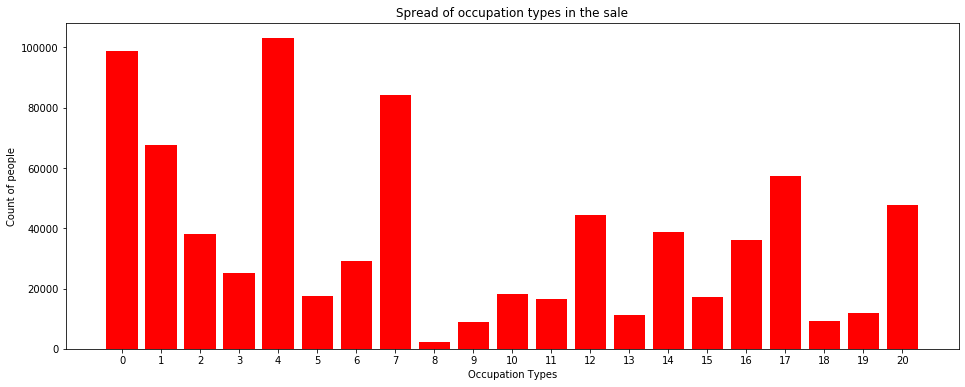

In [68]:
data_occup = dataNew['Occupation'].value_counts()
plt.figure(figsize = (16,6))
plt.bar(data_occup.index,data_occup.values,color ='r')
plt.xticks(data_occup.index)
plt.xlabel('Occupation Types')
plt.ylabel('Count of people')
plt.title('Spread of occupation types in the sale')

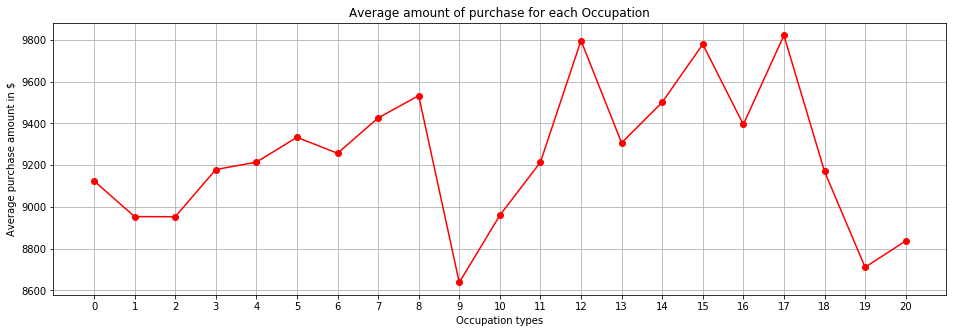

In [69]:
data = df.groupby('Occupation')['Purchase'].mean();
plt.figure(figsize=(16,5));
plt.grid();
plt.plot(data.index,data.values,'ro-');
plt.xlabel('Occupation types');
plt.ylabel('Average purchase amount in $');
plt.title('Average amount of purchase for each Occupation');
plt.xticks(data.index);

4.who has high purchase rate newly settled or people staying from long time?

Text(0.5, 1.0, 'count of people attended sale vs different stay in coutry')

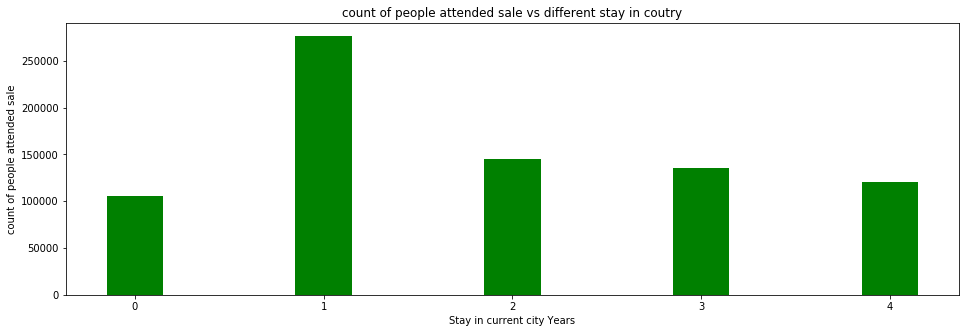

In [70]:
data = dataNew['Stay_In_Current_City_Years'].value_counts()

plt.figure(figsize=(16,5))
plt.bar(data.index,data.values,width=0.3,color = 'green')
plt.xlabel('Stay in current city Years')
plt.ylabel('count of people attended sale')
plt.title('count of people attended sale vs different stay in coutry')

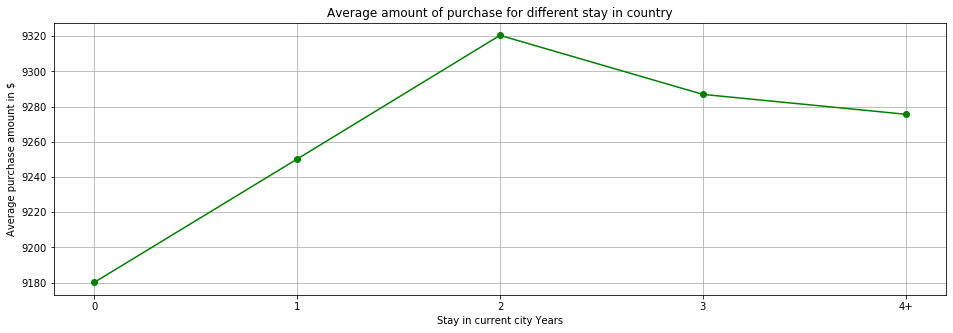

In [71]:
data = df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.figure(figsize=(16,5));
plt.grid();
plt.plot(data.index,data.values,'go-');
plt.xlabel('Stay in current city Years');
plt.ylabel('Average purchase amount in $');
plt.title('Average amount of purchase for different stay in country');

5.Top 10 products which made highest sales in the store?

In [72]:
data1 = df.groupby('Product_ID').agg({'Purchase':'sum'}).reset_index()
data2 = df['Product_ID'].value_counts()
data2 = pd.DataFrame({'Product_ID':data2.index, 'Count':data2.values})
data = pd.merge(data1,data2,left_on='Product_ID',right_on='Product_ID',how = 'left')
data = data.sort_values(['Purchase'],ascending=False)[0:10]

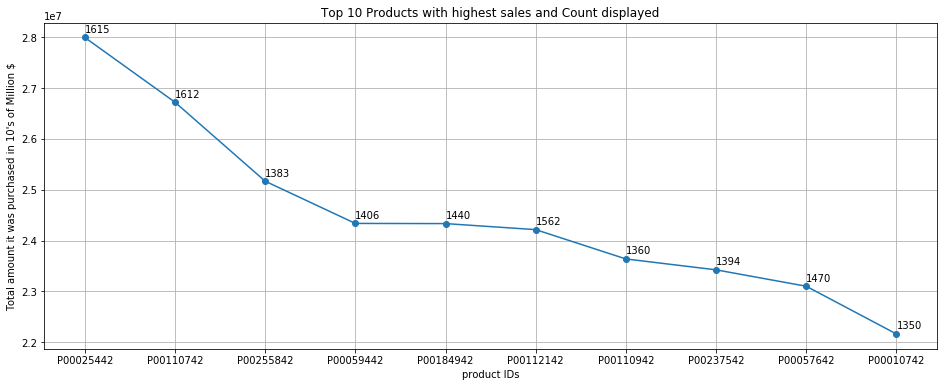

In [73]:
plt.figure(figsize=(16,6))
plt.grid()
plt.plot(data['Product_ID'],data['Purchase'],'o-')
plt.xlabel('product IDs')
plt.ylabel('Total amount it was purchased in 10\'s of Million $')
plt.title('Top 10 Products with highest sales and Count displayed')
for a,b,c in zip(data['Product_ID'], data['Purchase'], data['Count']): 
    plt.text(a, b+100000, str(c))  
plt.show()

We can see 10 products their purchase amount and count of products saled.

    1. 1st product has 1586 pieces sold with total sale of 27.5 million and 2nd product with 1591 pieces sold but with 26.5 million. which means 1st product might have higher product cost.
    2. 3rd product has 1354 units sold and 4th product has 1424 units sold but 4th product has low price than 3rd product so even it has higher products sold it has lesser sale amount than 3rd.
    3. Similarly we can observe for all the products.

6. Based on marital status and gender who has high purchase rate?

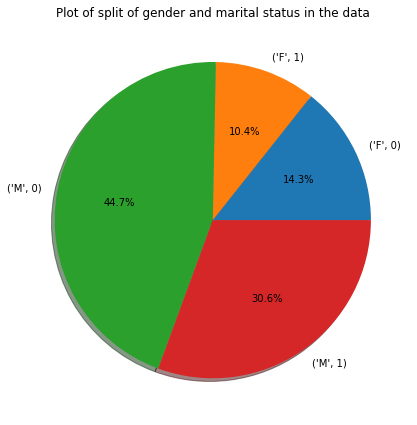

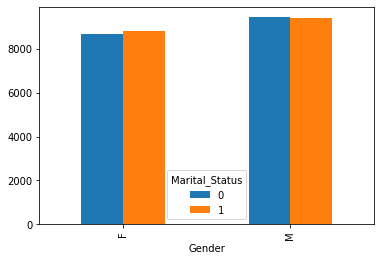

In [74]:
data = df.groupby(['Gender','Marital_Status'])['Gender'].count()
plt.figure(figsize=(16,16))
plt.subplot(211)
plt.pie(data.values,labels = data.index,autopct='%1.1f%%',shadow=True)
plt.title('Plot of split of gender and marital status in the data')
data = df.groupby(['Gender','Marital_Status'])['Purchase'].mean()

data.unstack(level=1).plot(kind='bar')

Males tend to purchase more and Unmarried Males are around 45% in the data and they show to purchase 9000$ on average.

7. Which product is popular for each age group?

In [75]:
data1 = dataNew.groupby('Age')['Product_ID'].apply(lambda x: x.value_counts().index[0]).reset_index()
data1

,Age,Product_ID
0,0,P00255842
1,1,P00265242
2,2,P00265242
3,3,P00025442
4,4,P00265242
5,5,P00265242
6,6,P00265242


8.What is the purchase percent for each age group and for Gender Group in total purchase amount?

Text(0.5, 1.0, 'Percent amount spent per gender')

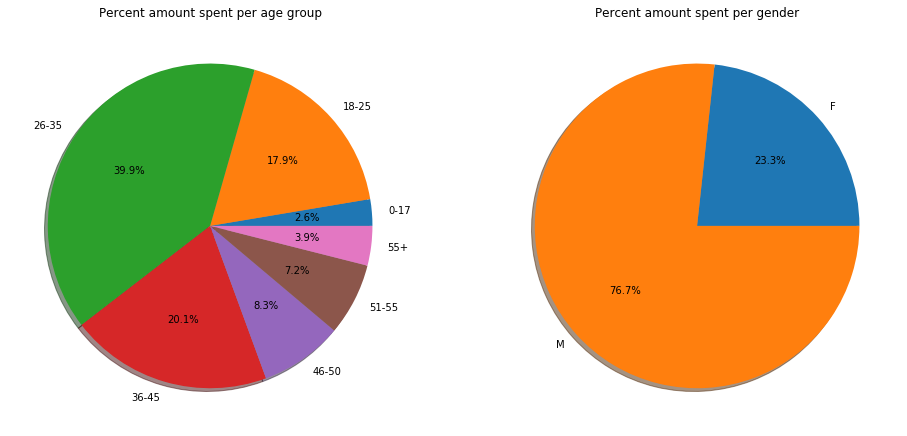

In [76]:
data = df.groupby('Age')['Purchase'].sum()
data_Sex = df.groupby('Gender')['Purchase'].sum()
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.pie(data.values,labels = data.index,autopct='%1.1f%%',shadow=True)
plt.title('Percent amount spent per age group')
plt.subplot(122)
plt.pie(data_Sex.values,labels = data_Sex.index,autopct='%1.1f%%',shadow=True)
plt.title('Percent amount spent per gender')

In [77]:
#df['Gender'] = df['Gender'].map({'F':0,'M':1})
#df.head()

In [78]:
#df['City_Category'].unique()

In [79]:
#df['City_Category'] = df['City_Category'].map({'A':0,'B':1, 'C':2})
#df.head()

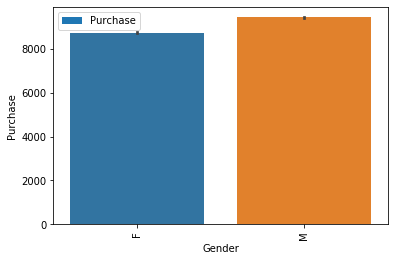

In [80]:
df[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = df)
plt.show()

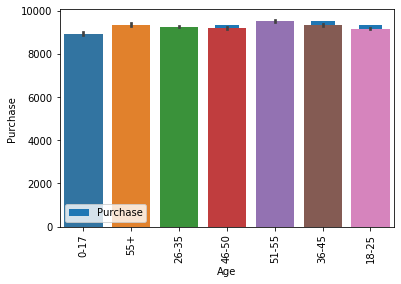

In [81]:
df[['Age','Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data = df)
plt.show()

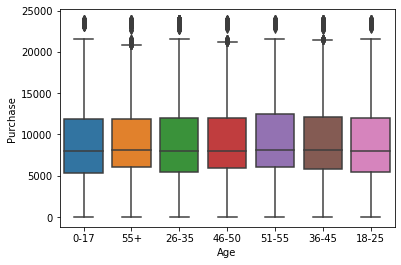

In [82]:
sns.boxplot('Age','Purchase', data = df)
plt.show()

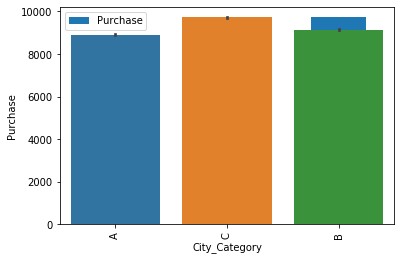

In [83]:
df[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data = df)
plt.show()

# Distribution of the target variable: Purchase

Text(0.5, 1.0, 'Purchase amount Distribution')

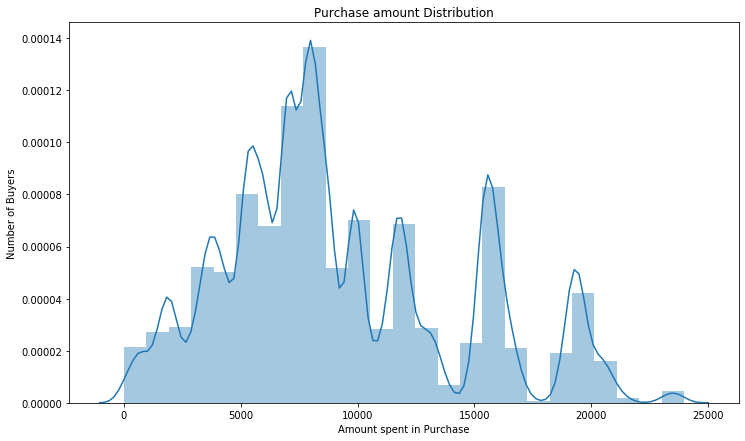

In [84]:
plt.figure(figsize=(12,7))
sns.distplot(df.Purchase, bins = 25)
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

In [85]:
print ('Skew is:', df.Purchase.skew())
print('Kurtosis: %f' % df.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


# Numerical Predictors

In [86]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

# Distribution of the variable: Occupation

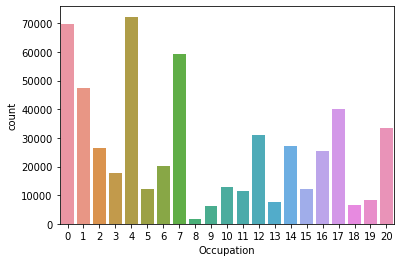

In [87]:
sns.countplot(df.Occupation)

# Distribution of the variable: Marital_Status

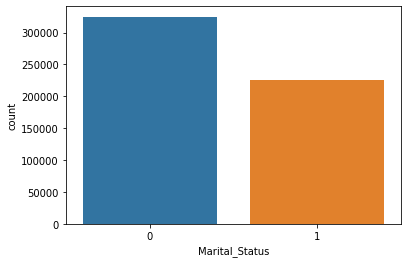

In [88]:
sns.countplot(df.Marital_Status)

# Distribution of the variable: Product_Category_1

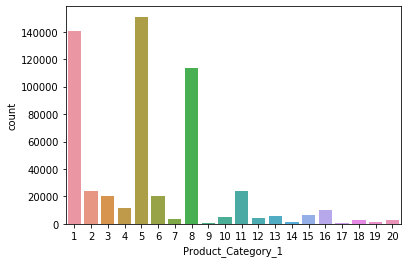

In [89]:
sns.countplot(df.Product_Category_1)

# Distribution of the variable: Product_Category_2

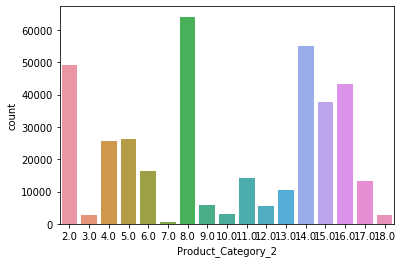

In [90]:
sns.countplot(df.Product_Category_2)

# Distribution of the variable: Product_Category_3

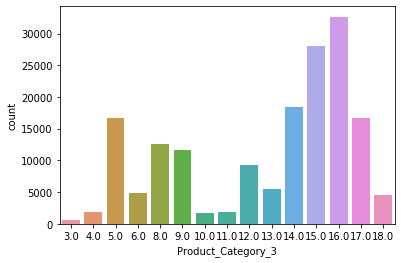

In [91]:
sns.countplot(df.Product_Category_3)

In [92]:
mean_cat_1 = df['Product_Category_1'].mean()
mean_cat_2 = df['Product_Category_2'].mean()
mean_cat_3 = df['Product_Category_3'].mean()
print(f"PC1: {mean_cat_1} \n PC2: {mean_cat_2} \n PC3 : {mean_cat_3}")

PC1: 5.404270017525106 
 PC2: 9.842329251122386 
 PC3 : 12.668243206790512


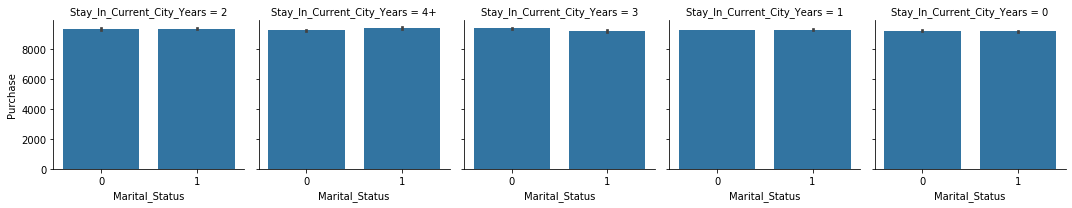

In [93]:
g = sns.FacetGrid(df,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase")

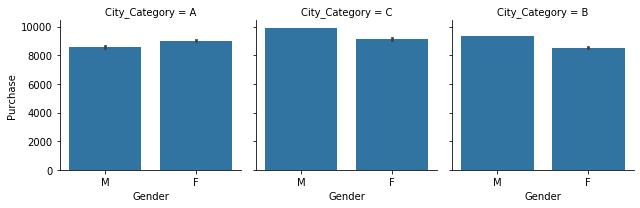

In [94]:
g = sns.FacetGrid(df,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase")

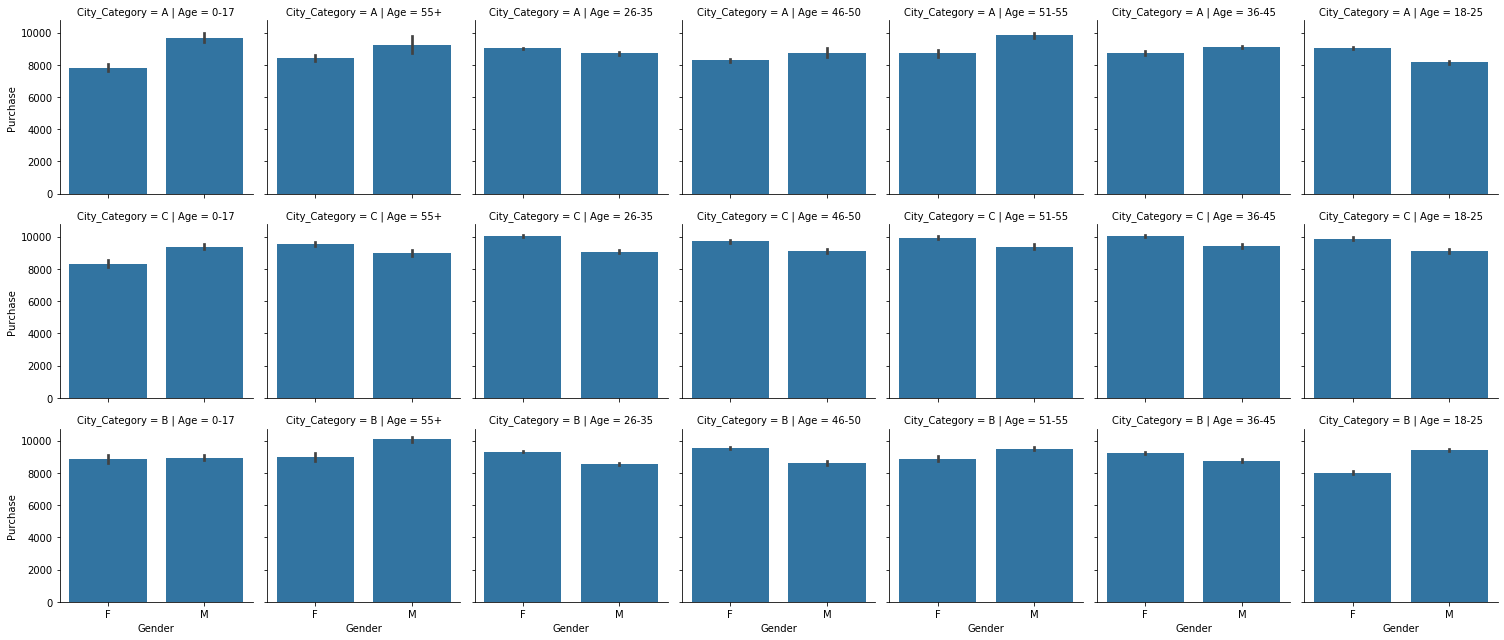

In [95]:
g = sns.FacetGrid(df,col="Age",row="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

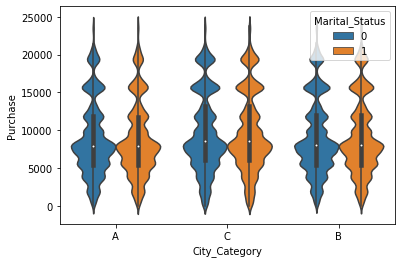

In [96]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',
               data=df)

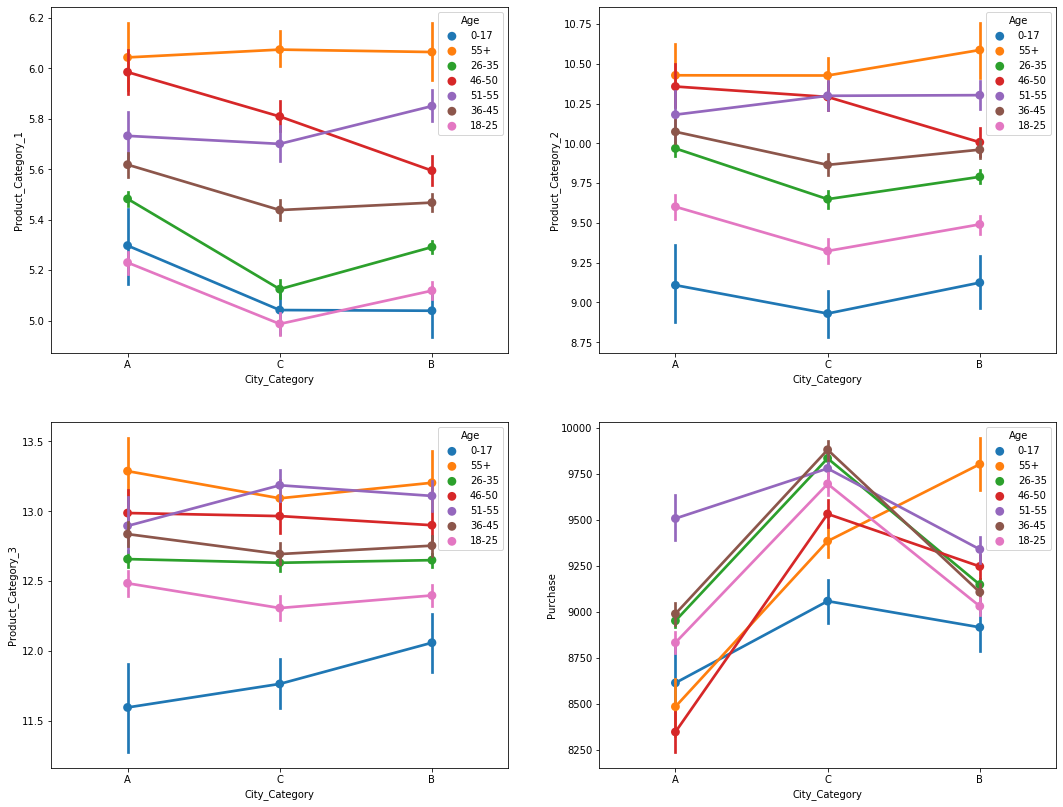

In [97]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Age',
                 data=df,
                 ax=axes[0,0]
                )
ax = sns.pointplot(y='Product_Category_2', x='City_Category',hue='Age',
                 data=df,
                 ax=axes[0,1]
                )
ax = sns.pointplot(y='Product_Category_3', x='City_Category', hue='Age',
                 data=df,
                 ax=axes[1,0]
                )
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',
                 data=df,
                 ax=axes[1,1]
                )

# Correlation between Numerical Predictors and Target variable

In [98]:
corr = numeric_features.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


In [99]:
#Check the percentage of null values per variable
dataNew.isnull().sum()/dataNew.shape[0]*100

Age                           0.0
City_Category                 0.0
Gender                        0.0
Marital_Status                0.0
Occupation                    0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Product_ID                    0.0
Purchase                      0.0
Stay_In_Current_City_Years    0.0
User_ID                       0.0
Age_Encoded                   0.0
dtype: float64